<a href="https://colab.research.google.com/github/Abhishek54765/Food_class_prediction/blob/main/Food_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
from tensorflow.keras.layers import Dropout, Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
import pandas as pd
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16
import cv2
from keras.models import load_model
import matplotlib.pyplot as plt


In [ ]:
a = open("/content/drive/MyDrive/food10/food_data.pickle",'rb')
X_train = pickle.load(a)

In [ ]:
b = open("/content/drive/MyDrive/food10/food_labels.pickle", 'rb')
Y_train = pickle.load(b)

In [ ]:
from keras.utils import np_utils

Y_enco =np_utils.to_categorical(Y_train)

In [ ]:
Y_encoo = np.array(Y_enco)

In [ ]:
x_train = X_train/255.0

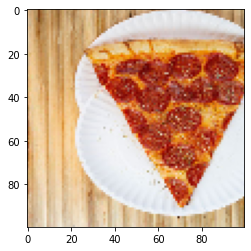

In [ ]:
plt.imshow(np.squeeze(x_train[1]))

In [ ]:
Y_train[1]

4

In [ ]:
Y_train.shape

(1316,)

In [ ]:
x_train[1].shape

(100, 100, 3)

In [ ]:
train_datagen = ImageDataGenerator(rotation_range=45,
                                   width_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_datagen.fit(x_train)

In [ ]:
train_generator = train_datagen.flow(x_train,Y_encoo, batch_size=32)

In [ ]:
resnet = ResNet50(input_shape=x_train[1].shape, weights='imagenet', include_top=False)

94773248/94765736 [==============================] - 2s 0us/step


In [ ]:
for layer in resnet.layers:
    layer.trainable = False

In [ ]:

# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
adam = Adam(learning_rate=.001)

In [ ]:
prediction = Dense(5, activation='softmax')(x)
model1 = Model(inputs=resnet.input, outputs=prediction)
model1.compile(
  loss='categorical_crossentropy',
  optimizer=adam,
  metrics=['accuracy']
)    

In [ ]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 106, 106, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 50, 50, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 50, 50, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# model1.fit_generator(train_generator,steps_per_epoch=len(train_generator), epochs=50, validation_data=(x_train[:100], Y_encoo[:100]))

In [ ]:
vgg16 = VGG16(weights="imagenet", input_shape = x_train[1].shape, include_top=False)

for layer in vgg16.layers:
    layer.trainable = False

z = Flatten()(vgg16.output)
prediction = Dense(5, activation='softmax')(z)
model1 = Model(inputs=vgg16.input, outputs=prediction)
model1.compile(
  loss='categorical_crossentropy',
  optimizer=adam,
  metrics=['accuracy']
)    

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
model1.fit_generator(train_generator,steps_per_epoch=len(train_generator), epochs=40, validation_data=(x_train[:150], Y_encoo[:150]))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
42/42 [==============================] - 36s 110ms/step - loss: 1.2363 - accuracy: 0.5319 - val_loss: 0.7953 - val_accuracy: 0.7067
Epoch 2/40
42/42 [==============================] - 3s 76ms/step - loss: 0.7737 - accuracy: 0.7386 - val_loss: 0.5565 - val_accuracy: 0.8133
Epoch 3/40
42/42 [==============================] - 3s 81ms/step - loss: 0.6756 - accuracy: 0.7538 - val_loss: 0.4884 - val_accuracy: 0.8400
Epoch 4/40
42/42 [==============================] - 3s 77ms/step - loss: 0.5971 - accuracy: 0.7986 - val_loss: 0.4480 - val_accuracy: 0.8600
Epoch 5/40
42/42 [==============================] - 3s 75ms/step - loss: 0.5437 - accuracy: 0.8207 - val_loss: 0.4339 - val_accuracy: 0.8200
Epoch 6/40
42/42 [==============================] - 3s 76ms/step - loss: 0.5206 - accuracy: 0.8222 - val_loss: 0.4153 - val_accuracy: 0.8200
Epoch 7/40
42/42 [==============================] - 3s 77ms/step - loss: 0.5293 - accuracy: 0.8085 - val_loss: 0.4000 - val_accuracy: 0.8267
Epoch 8/40


In [ ]:
%cd /content/drive/MyDrive/food

/content/drive/MyDrive/food


In [ ]:
model1.save("model")

NameError: ignored

In [ ]:
model = load_model('/content/drive/MyDrive/food10/model')

In [ ]:
r = model

Testing the model on a test image.

In [ ]:
imgg = cv2.imread('/content/drive/MyDrive/pizza.jpg')
# gray = cv2.cvtColor(imgg, cv2.COLOR_BGR2GRAY)
from keras.preprocessing.image import img_to_array
img_array = img_to_array(imgg)
resized = cv2.resize(img_array, (100, 100))
normalizedd = resized/255.0
reshaped = np.reshape(normalizedd, (1, 100, 100, 3))
resultt = model.predict(reshaped)

In [ ]:

resultt

array([[9.90125864e-06, 1.79755483e-02, 1.04978727e-03, 1.20018914e-04,
        9.80844736e-01]], dtype=float32)

In [ ]:

import numpy as np
y_pred = np.argmax(resultt, axis=1)

In [ ]:
y_pred

array([4])